Scenario 1: Simple 2D Robot Motion

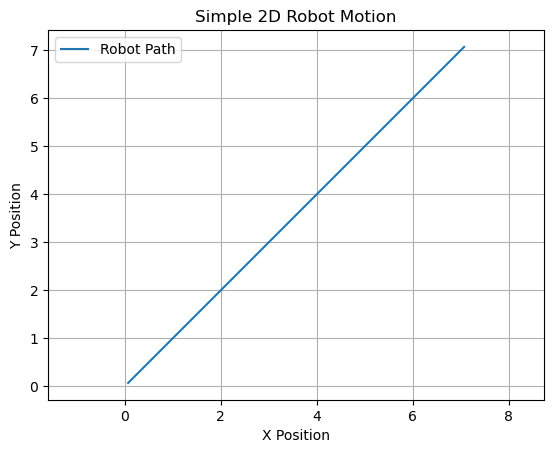

In [85]:
#Scenario 1: Simple 2D Robot Motion
import numpy as np
import matplotlib.pyplot as plt

x = 0
y = 0
theta = np.pi / 4 #45 degrees
v = 1 #velocity
dt = np.linspace(0, 10, 100) #time interval

x_path = []
y_path = []

#Simulation
for t in dt:
  x += v * np.cos(theta) * 0.1 #0.1 is the sampling time
  y += v * np.sin(theta) * 0.1
  x_path.append(x) #add path
  y_path.append(y)

#Plot Output
plt.plot(x_path, y_path, label = 'Robot Path')
plt.legend()
plt.grid(True)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.title('Simple 2D Robot Motion')
plt.show()

Scenario 2: Simple 2D Robot Motion with Obstacles

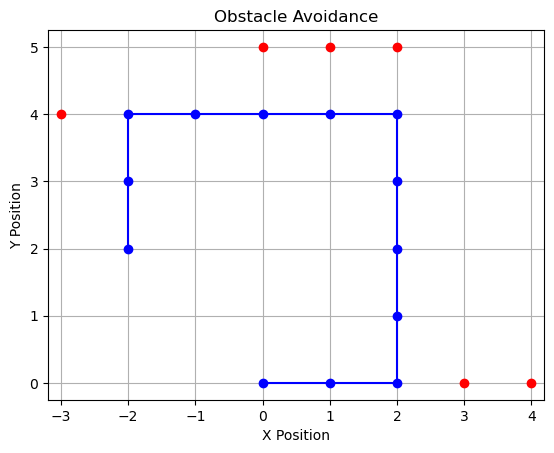

In [86]:
#Scenario 2: Simple 2D Robot Motion with Obstacles
import matplotlib.pyplot as plt

x, y = [0], [0] #initial position
directions = [(1, 0), (0, 1), (-1, 0), (0, -1)] #right, up, left, down
direction_index = 0
obstacles = [(3, 0), (4, 0), (0, 5), (1, 5), (2, 5), (-3, 4)] #coordinates of obstacles

#Simulation
for _ in range(15):
    next_x = x[-1] + directions[direction_index][0]
    next_y = y[-1] + directions[direction_index][1]

    if (next_x, next_y) in obstacles:
        direction_index = (direction_index + 1) % 4 #change direction
        continue
    else:
        x.append(next_x)
        y.append(next_y)

#Plot Output  
for ox, oy in obstacles:
  plt.plot(ox, oy, 'ro') #ro is red circle

plt.plot(x, y, 'bo-') #bo is blue circle
plt.axis('equal')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Obstacle Avoidance')
plt.grid(True)
plt.show()



Scenario 3: Line Following using Proportional Integral Derivative (PID) Controller

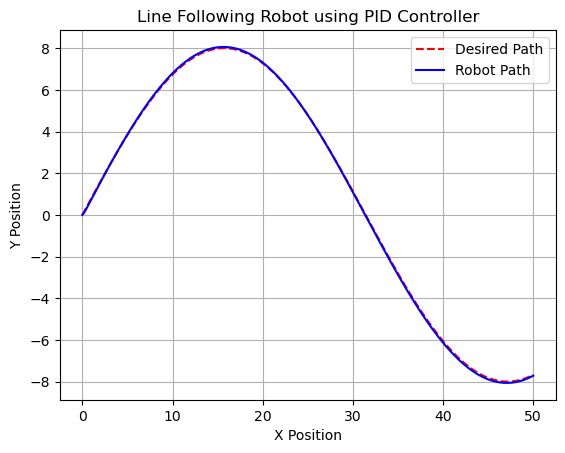

In [87]:
#Scenario 3: Line Following using Proportional Integral Derivative (PID) Controller
import numpy as np
import matplotlib.pyplot as plt

#Desired Path
x = np.linspace(0, 50, 500)
y_desired = 8 * np.sin(0.1 * x)

#PID Controller
Kp = 0.5
Ki = 0.01
Kd = 0.1

y_robot = 0
y_path = []
error_sum = 0
prev_error = 0

#Simulation
for i in range(len(x)):
    error = y_desired[i] - y_robot
    error_sum += error
    derivative = error - prev_error
    y_robot += Kp * error + Ki * error_sum + Kd * derivative
    prev_error = error
    y_path.append(y_robot)

#Plot Output
plt.plot(x, y_desired, 'r--', label = 'Desired Path') #r-- is red dotted line
plt.plot(x, y_path, 'b-', label = 'Robot Path') #b-- is blue dotted line
plt.legend()
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Line Following Robot using PID Controller')
plt.grid(True)
plt.show()

Scenario 4: Path Planning with A* Algorithm

In [88]:
#Scenario 4: Path Planning with A* Algorithm
import heapq 

grid = [
  [0, 0, 0, 1, 0],
  [1, 1, 0, 1, 0],
  [0, 0, 0, 0, 0],
  [0, 1, 1, 1, 1],
  [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

#Heuristic using Manhattan Distance
def heuristic(a, b):
  return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid, start, goal):
  queue = []
  heapq.heappush(queue, (0 + heuristic(start,goal), 0, start, []))
  visited = set ()

  while queue:
    _, cost, current, path = heapq.heappop(queue)
    if current in visited:
      continue
    visited.add(current)
    path = path + [current]
    
    if current == goal:
      return path
    
    for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
      new_x = current[0] + dx
      new_y = current[1] + dy
      if 0 <= new_x < len(grid) and 0 <= new_y < len(grid[0]) and grid[new_x][new_y] == 0:
          heapq.heappush(queue, (cost + 1 + heuristic((new_x, new_y), goal), cost + 1, (new_x, new_y), path))

  return []

#Output
path = a_star(grid, start, goal)
for i in range(len(grid)):
  for j in range(len(grid[0])):
    if (i, j) == start:
      print("S", end=" ")
    elif (i, j) == goal:
      print("G", end=" ")
    elif (i, j) in path:
      print("*", end=" ")
    elif grid[i][j] == 1:
      print("#", end=" ")
    else:
      print(".", end=" ")
  print()

S * * # . 
# # * # . 
* * * . . 
* # # # # 
* * * * G 


Scenario 5: Two Robots Avoiding Collisions

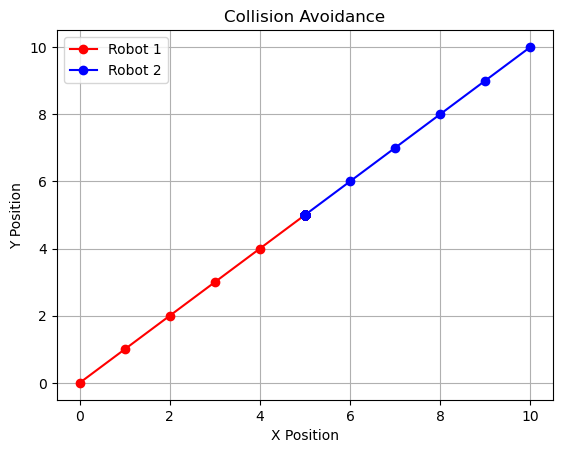

In [89]:
#Scenario 5: Two Robots Avoiding Collisions
import matplotlib.pyplot as plt

robot1 = [[0,0]]
robot2 = [[10,10]]

#Simulation
for i in range(100):
  r1 = robot1[-1]
  r2 = robot2[-1]
  
  #Move towards Each Other
  dx1 = 1 if r1[0] < r2[0] else -1
  dy1 = 1 if r1[1] < r2[1] else -1
  dx2 = -dx1
  dy2 = -dy1
  
  #Collision Avoidance
  if abs(r1[0] - r2[0]) <= 1 and abs(r1[1] - r2[1]) <= 1:
    dx1 = dy1 = dx2 = dy2 = 0

  robot1.append([r1[0] + dx1, r1[1] + dy1])
  robot2.append([r2[0] + dx2, r2[1] + dy2])

robot1 = list(zip(*robot1))
robot2 = list(zip(*robot2))

#Plot Output
plt.plot(*robot1, 'r-o', label = 'Robot 1') #r-o is red circle
plt.plot(*robot2, 'b-o', label = 'Robot 2') #b-o is blue circle
plt.legend()
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Collision Avoidance')
plt.grid(True)
plt.show()

Scenario 6: 2-Link Planar Arm

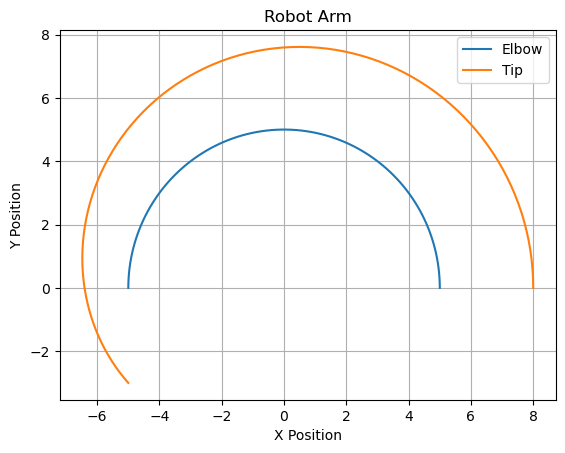

In [90]:
#Scenario 6: 2-Link Planar Arm
import numpy as np
import matplotlib.pyplot as plt

l1 = 5
l2 = 3
theta1_range = np.linspace(0, np.pi, 100)
theta2_range = np.linspace(0, np.pi/2, 100)

x1, y1 = [], []
x2, y2 = [], []

#Simulation
for t1, t2 in zip(theta1_range, theta2_range):
  x_elbow = l1 * np.cos(t1)
  y_elbow = l1 * np.sin(t1)
  x_tip = x_elbow + l2 * np.cos(t1 + t2)
  y_tip = y_elbow + l2 * np.sin(t1 + t2)

  x1.append(x_elbow)
  y1.append(y_elbow)
  x2.append(x_tip)
  y2.append(y_tip)

#Plot Output
plt.plot(x1, y1, label = 'Elbow')
plt.plot(x2, y2, label = 'Tip')
plt.legend()
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Robot Arm')
plt.grid(True)
plt.show()

Scenario 7: SLAM Mapping Simulation

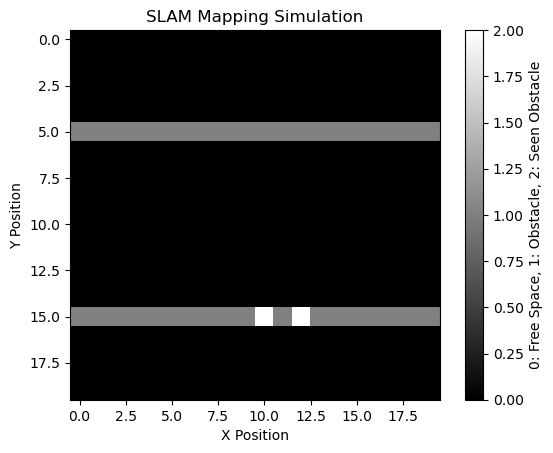

In [96]:
#Scenario 7: SLAM Mapping Simulation

import numpy as np
import matplotlib.pyplot as plt

grid = np.zeros((20, 20))
robot_pos = [10, 10]
directions = [(0, -1), (0, 1), (-1, 0), (1, 0)] #up, down, left, right

#Simulation
#Obstacle
for i in range(20):
  grid[5][i] = 1
  grid[15][i] = 1

#Movement and Mapping
for _ in range(100):
  for dx, dy in directions:
    scan_x = robot_pos[0] + dx * 2
    scan_y = robot_pos[1] + dy * 2
    if 0 <= scan_x < 20 and 0 <= scan_y < 20:
      if grid[scan_x][scan_y] == 1:
        grid[scan_x][scan_y] = 2 #obstacle
      else:
        grid[scan_x][scan_y] = 0 #free space
    robot_pos[0] += 1

#Plot Output
plt.imshow(grid, cmap='gray')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.colorbar(label='0: Free Space, 1: Obstacle, 2: Seen Obstacle')
plt.title('SLAM Mapping Simulation')
plt.show()

Scenario 8: Wall Avoidance via Reinforcement Learning (Q-Learning)

In [92]:
#Scenario 8: Wall Avoidance via Reinforcement Learning (Q-Learning)
import numpy as np
import random

actions = ['up', 'down', 'left', 'right']
grid = np.zeros((5, 5))
grid[1][1] = grid[1][2] = grid[1][3] = -1 #obstacles
q_table = np.zeros((5, 5, 4))
alpha, gamma, episodes = 0.1, 0.9, 100

#Simulation
def choose_action(state):
    if random.random() < 0.2:
        return random.randint(0, 3)
    return np.argmax(q_table[state[0], state[1]])

for _ in range(episodes):
  pos = [0, 0]
  for _ in range(50):
    action = choose_action(pos)
    new_pos = pos.copy()
    if actions[action] == 'up': new_pos[0] -= 1
    elif actions[action] == 'down': new_pos[0] += 1
    elif actions[action] == 'left': new_pos[1] -= 1
    elif actions[action] == 'right': new_pos[1] += 1

    if not (0 <= new_pos[0] < 5 and 0 <= new_pos[1] < 5):
      reward = -5
      new_pos = pos
    elif grid[new_pos[0]][new_pos[1]] == -1:
      reward = -10
      new_pos = pos
    else:
      reward = 1

    best_next = np.max(q_table[new_pos[0], new_pos[1]])
    q_table[pos[0], pos[1], action] += alpha * (reward + gamma * best_next - q_table[pos[0], pos[1], action])
    pos = new_pos

#Output
print("Final Q Values")
print(np.round(np.max(q_table, axis=2), 2))

Final Q Values
[[10.   10.    5.19  0.27  0.  ]
 [10.    0.    0.    0.    0.  ]
 [10.    0.8   0.88  0.    0.  ]
 [ 3.6   0.71  0.83  0.    0.  ]
 [ 0.    0.    0.31  0.    0.  ]]
